# 九、SVM支持向量机(Support Vector Machine)

## 1. Model

其实从预测的模型上来说和感知机是一样的
$$
z = \vec w \cdot \vec x + b=w_1x_1+w_2x_2+...+w_nx_n+b\\
y=sign(z)=
\begin{cases}
1, z\geq0\\
0, z<0
\end{cases}
$$

## 2. 损失函数

SVM的损失函数
$$
J(w) = \sum_{x_i\in{M}}{[y^{(i)}*cost_1( \vec w \cdot \vec x^{(i)}+b)+(1-y^{(i)})*cost_2(\vec w \cdot \vec x^{(i)}+b)]}
$$
令$z=\vec w \cdot \vec x^{(i)}+b$ ，当$y^{(i)} =1$ 时，损失函数为 
$$
cost_1(z) = max\{0, -z+1\}
$$
当$y^{(i)} =0$ 时，损失函数为
$$
cost_2(z) = max\{0, z+1\}
$$
这里借助吴恩达课程里对比logistic regression的损失函数的图对这个损失函数进行可视化，其实这种loss好像有一个名字叫hingeloss

![image-20221024172509546](https://s2.loli.net/2022/10/24/GUzbt6uYEHTZ3af.png)



## 3. SVM witho Regularization 

给损失函数加入正则化项，这里C为常数，当C比较大时容易过拟合，C比较小时，容易欠拟合bias容易偏大。
$$
J(w) = C * \sum_{x_i\in{M}}{[y^{(i)}*cost_1( \vec w \cdot \vec x^{(i)}+b)+(1-y^{(i)})*cost_2(\vec w \cdot \vec x^{(i)}+b)]} + \frac{1}{2}*\sum_{i=1}^n{\theta_i^2}
$$


## 4. large margin classifier的理解



SVM还有个名字叫large margin classifier，其实我觉得相比较于逻辑回归，和感知机模型对比能更好的理解margin这个概念，可以参考感知机模型里关于损失函数原理的推导部分。回顾一下感知机的模型和损失函数
$$
z = \vec w \cdot \vec x + b=w_1x_1+w_2x_2+...+w_nx_n+b\\
y=sign(z)=
\begin{cases}
1, z\geq0\\
-1, z<0
\end{cases}
$$

$$
J(w) = -\sum_{x_i\in{M}}{y^{(i)}( \vec w \cdot \vec x^{(i)}+b)}
$$

可以看到这里的预测模型是和SVM完全一致的，唯一的区别在于损失函数。另外一个细微的差别是这里的负样本的定义，这里其实我们也可以把感知机模型的损失函数转换为负样本为0的模式，另外我们这里通过cost设置max函数，可以把损失函数从面向误分类点的转为总样本点的损失和，因为对于正确分类的点其cost会等于0.
$$
J(w) = -\sum_{x_i\in{M}}{[y^{(i)}*cost_1( \vec w \cdot \vec x^{(i)}+b)+(1-y^{(i)})*cost_2(\vec w \cdot \vec x^{(i)}+b)]}
$$
令$z=\vec w \cdot \vec x^{(i)}+b$ ，当$y^{(i)} =1$ 时，损失函数为 
$$
cost_1(z) =max\{0, -z\}
$$
当$y^{(i)} =0$ 时，损失函数为
$$
cost_2(z) =max\{0, z\}
$$
因此，我们可以直观的发现，SVM和感知机的区别在于加上1，且取max{0，?}，从感知机里的原理推导我们得知$z=\vec w \cdot \vec x^{(i)}+b$ 的绝对值几何意义其实是分类点到超平面$\vec x \vec w + b=0$ 的距离，因此从几何上理解SVM，对于正样本，$cost_1(z) = max\{0, -z+1\}$ 我们希望其到超平面$\vec x \vec w + b=0$的距离能大于1；对于负样本，$cost_2(z) = max\{0, z+1\}$ ，我们希望其到超平面$\vec x \vec w + b=0$的距离也能大于1，负样本在超平面另外一侧。总结，从这里可以理解为什么svm又名large margin classifier。因为它的loss要求比感知机强，它希望超平面能留在中间区域。

这里可以参考吴恩达课程里的图进一步可视化理解

![image-20221024153613493](https://s2.loli.net/2022/10/24/uy1KMYhJtSrVGWm.png)

## 5. SVM with Kernel

对于非线性边界的问题，svm似乎经常会结合kernel来解决。简单来说加入kernel需要确定两点，一是选择similarity函数K，二是选择landmark，一般就直接选择所有样本点了。最常用的核函数有高斯核函数
$$
K(x, l) = exp(-\frac{||x-l||_2^2}{2\sigma^2})
$$
因此假设有m个样本点，每个样本点的初始特征维度为n，对每个样本点与另外的m个样本点进行核函数运算，得到m维新特征，因此最后的特征矩阵X为m*m维。

## 6. 分类算法的选择经验



![image-20221024160721457](https://s2.loli.net/2022/10/24/NI9jWfcugybxCRD.png)

## 6.sklearn实现

[1 0 1 0]


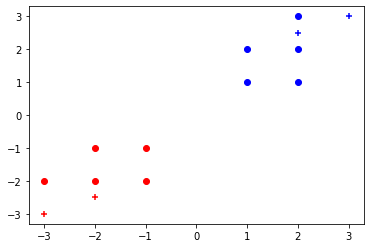

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt


X = np.array([
    [1, 1],
    [2, 2],
    [1, 2],
    [2, 3],
    [2, 1],
    [-1, -1],
    [-2, -2],
    [-2, -1],
    [-1, -2],
    [-3, -2],
])
y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=np.int8)
pos_data = X[y==1]
neg_data = X[y==0]
plt.scatter(pos_data[:, 0], pos_data[:, 1], marker='o', color='b')
plt.scatter(neg_data[:, 0], neg_data[:, 1], marker='o', color='r')


svc = SVC()
svc.fit(X, y)
X_test = np.array([
    [2, 2.5],
    [-2, -2.5],
    [3, 3],
    [-3, -3],
])
y_test = svc.predict(X_test)
print(y_test)
X_test_pos = X_test[y_test==1]
X_test_neg = X_test[y_test==0]
plt.scatter(X_test_pos[:, 0], X_test_pos[:, 1], marker='+', color='b')
plt.scatter(X_test_neg[:, 0], X_test_neg[:, 1], marker='+', color='r')
plt.show()